# Loading Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


df1 = pd.read_csv('Unemployment in India.csv')
df2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [ ]:
# displaying the first 5 rows
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# displaying the first 5 rows
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Data Preprocessing

In [5]:
# dropping unnecessary columns
df2.drop(columns=['longitude', 'latitude'], inplace=True)
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South


In [6]:
# handling missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# checking for null values
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [7]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                       

In [9]:
# checking for duplicates
df1.duplicated().sum()
df2.duplicated().sum()

0

In [ ]:
from datetime import datetime

# removing spaces from column names
df1.columns = df1.columns.str.replace(' ', '')
df2.columns = df2.columns.str.replace(' ', '')

# converting date column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

In [11]:
# merging the dataframes
df = pd.concat([df1, df2], ignore_index=True)
df

,Region,Date,Frequency,EstimatedUnemploymentRate(%),EstimatedEmployed,EstimatedLabourParticipationRate(%),Area,Region.1
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,NaN
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,NaN
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,NaN
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,NaN
...,...,...,...,...,...,...,...,...
1002,West Bengal,2020-06-30,M,7.29,30726310.0,40.39,NaN,East
1003,West Bengal,2020-07-31,M,6.83,35372506.0,46.17,NaN,East
1004,West Bengal,2020-08-31,M,14.87,33298644.0,47.48,NaN,East
1005,West Bengal,2020-09-30,M,9.35,35707239.0,47.73,NaN,East


In [ ]:
# feature engineering
#
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['Covid-19 Impact'] = np.where(df['Date'] >= '2020-04-01', 'Post-COVID', 'Pre-COVID')


# Exploratory Data Analysis (EDA)

In [13]:
# Unemployment Rate Over Time
fig = px.colors.qualitative.swatches()
fig = px.line(df, x='Date', y='EstimatedUnemploymentRate(%)', color='Region', title='Unemployment Rate Over Time', )
fig.show()

In [14]:
# Unemployment Rate by Region 
fig = px.bar(df, x='Region', y='EstimatedUnemploymentRate(%)', title='Unemployment Rate by Region', color='Region')
fig.show()

In [42]:
# Unemployment Rate Before and After COVID-19
fig = px.bar(df, x='Covid-19 Impact', y='EstimatedUnemploymentRate(%)', title='Unemployment Rate Before and After COVID-19', color='Covid-19 Impact',
             color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(width=1000, height=600, bargap=0.6)
fig.show()


In [16]:
# Labour Participation Rate Over Time
fig = px.line(df, x='Date', y='EstimatedLabourParticipationRate(%)', color='Region', title='Labour Participation Rate Over Time')
fig.show()

In [17]:
# Unemployment Rate vs. Labour Participation Rate
fig = px.scatter(df, x='EstimatedUnemploymentRate(%)', y='EstimatedLabourParticipationRate(%)', color='Region', title='Unemployment Rate vs. Labour Participation Rate')
fig.show()

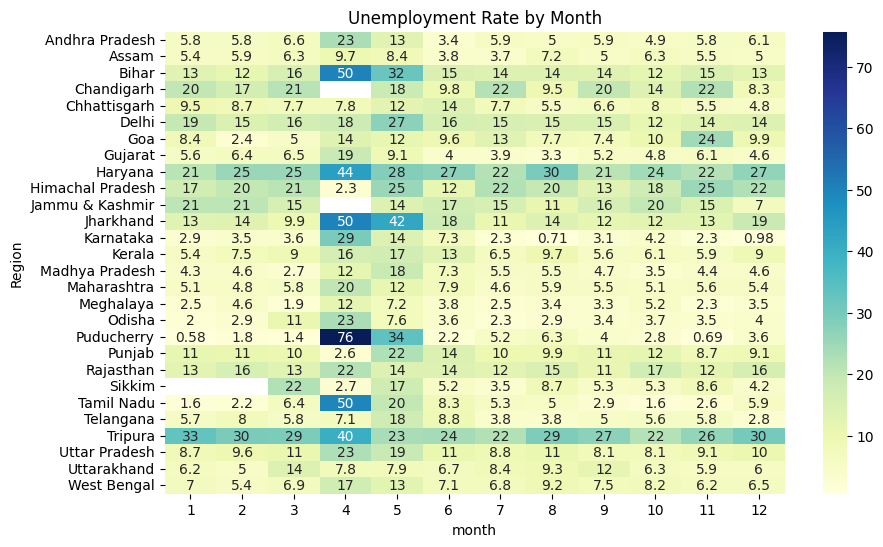

In [18]:
# Unemployment Rate by Month (Heatmap)
heatmap_data = df.pivot_table(values='EstimatedUnemploymentRate(%)', index='Region', columns='month')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Unemployment Rate by Month')
plt.show()


In [19]:
# Top 10 States with Highest Unemployment Rate
top_states = df.groupby('Region')['EstimatedUnemploymentRate(%)'].mean().nlargest(10).reset_index()

fig = px.bar(top_states, x='Region', y='EstimatedUnemploymentRate(%)', color='Region',
              title='Top 10 States with Highest Unemployment Rate', color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(width=1000, height=600, bargap=0.3)
fig.show()


In [38]:
# Top 10 States with Lowest Unemployment Rate
fig = px.histogram(df, x='Region', y='EstimatedUnemploymentRate(%)', color='Region',
              title='Top 10 States with Lowest Unemployment Rate', color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(width=1000, height=600, bargap=0.3)
fig.show()

In [41]:
# Unemployment Rate by Area (Rural vs. Urban)
fig = px.bar(df.groupby('Area')['EstimatedUnemploymentRate(%)'].mean().reset_index(), 
               x='Area', y='EstimatedUnemploymentRate(%)', color='Area', color_discrete_sequence=px.colors.qualitative.D3, title='Unemployment Rate by Area (Rural vs. Urban)')
fig.update_layout(width=1000, height=600, bargap=0.6)
fig.show()

# Conclusion

## Impact of COVID-19 on Unemployment:

The unemployment rate spiked significantly in April 2020, coinciding with the nationwide lockdown imposed due to COVID-19.

Post-COVID unemployment rates remained higher than pre-COVID levels, indicating a prolonged economic impact.

## Regional Disparities:

Regions like Haryana, Tripura, and Jharkhand had the highest average unemployment rates.

Southern regions like Karnataka and Tamil Nadu showed relatively lower unemployment rates compared to northern and eastern regions.

## Rural vs. Urban Unemployment:

Rural areas experienced higher unemployment rates compared to urban areas during the pandemic.

This could be attributed to the reliance of rural economies on informal sectors, which were severely affected by the lockdown.

## Labor Participation Rate:

The labor participation rate dropped significantly during the lockdown but showed signs of recovery in late 2020.

This indicates that while people returned to the workforce, job opportunities remained limited.

## Seasonal Trends:

Unemployment rates showed seasonal fluctuations, with higher rates during certain months (e.g., April-June 2020).

Post-COVID, the unemployment rate stabilized but remained higher than pre-COVID levels.